# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)
 
### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

# Data Retrieval 

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Extracting the dataset from the source (CSV file)
df = pd.read_csv("/Users/yuti/Documents/Elevate Me/Fundamental/SQL /Capstone Part 1/HR-Analytics Dataset.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The every first thing is to load the dataset to a dataframe from the source file. To get an idea of the dataset structure, head() function is used which prints the first 5 rows. Further, info() functions is used to retrieve the data type and non-null counts of the columns. describe() function provided statistical summaries for numerical features.

# Data preprocessing

In [11]:
# Checking for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing value in the dataset.

In [23]:
#checking for duplicate records
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [32]:
def check_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Outliers in '{column}': {len(outliers)}")
    return outliers

#Checking for outliers in a numerical column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    check_outliers_iqr(df, col)

Outliers in 'Age': 0
Outliers in 'DailyRate': 0
Outliers in 'DistanceFromHome': 0
Outliers in 'Education': 0
Outliers in 'EmployeeCount': 0
Outliers in 'EmployeeNumber': 0
Outliers in 'EnvironmentSatisfaction': 0
Outliers in 'HourlyRate': 0
Outliers in 'JobInvolvement': 0
Outliers in 'JobLevel': 0
Outliers in 'JobSatisfaction': 0
Outliers in 'MonthlyIncome': 114
Outliers in 'MonthlyRate': 0
Outliers in 'NumCompaniesWorked': 52
Outliers in 'PercentSalaryHike': 0
Outliers in 'PerformanceRating': 226
Outliers in 'RelationshipSatisfaction': 0
Outliers in 'StandardHours': 0
Outliers in 'StockOptionLevel': 85
Outliers in 'TotalWorkingYears': 63
Outliers in 'TrainingTimesLastYear': 238
Outliers in 'WorkLifeBalance': 0
Outliers in 'YearsAtCompany': 104
Outliers in 'YearsInCurrentRole': 21
Outliers in 'YearsSinceLastPromotion': 107
Outliers in 'YearsWithCurrManager': 14
Outliers in 'Attrition_Encoded': 237


Significant outliers are observed in several key features in this dataset

1)High volume outliers: YearsAtCompany(104), YearsSinceLastPromotion(107), MonthlyIncome (114), PerformanceRating (226), TrainingTimesLastYear (238), Attrition_Encoded (237)

2)Moderate volume outliers: StockOptionLevel (85), TotalWorkingYears (63), NumCompaniesWorked (52)

3)Lower volume outliers: YearsWithCurrManager (14), YearsInCurrentRole (21)

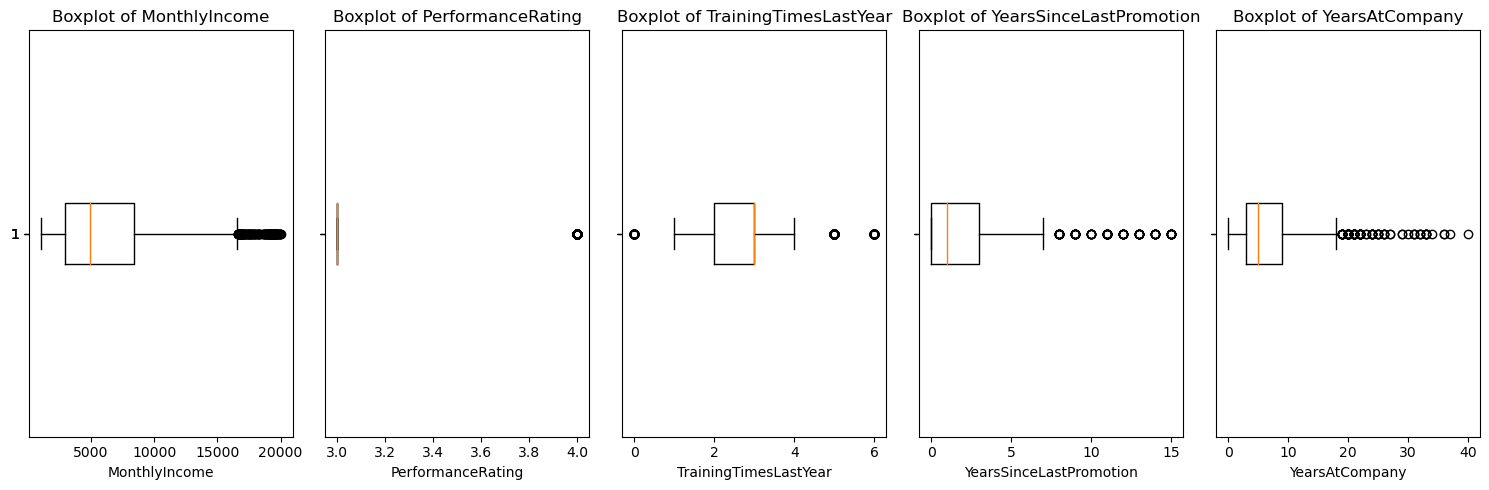

In [35]:
import matplotlib.pyplot as plt

#List of critical variables to analyze
critical_variables = ['MonthlyIncome', 'PerformanceRating', 'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'YearsAtCompany']

#Visualizing Outliers using Boxplots
fig, axes = plt.subplots(1, len(critical_variables), figsize=(15, 5), sharey=True)

for i, column in enumerate(critical_variables):
    axes[i].boxplot(df[column], vert=False)
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


In [38]:
from scipy.stats.mstats import winsorize
# For capping
columns_to_cap = ['PerformanceRating', 'TrainingTimesLastYear', 
                  'YearsSinceLastPromotion', 'YearsAtCompany']
for col in columns_to_cap:
    df[col] = winsorize(df[col], limits=[0, 0.05])

# For log transformation
df['MonthlyIncome_log'] = np.log1p(df['MonthlyIncome'])

Capping technique is applied to "PerformanceRating, TrainingTimesLastYear, YearsSinceLastPromotion, and YearsAtCompany" to reduce the impact of values that are extreme and log transformation is applied on "MonthlyIncome"  as it helps make this distribution more normal and reduces the impact of large salary gaps.

In [42]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [43]:
if 'Over18' in df.columns and df['Over18'].nunique() == 1:
    df.drop('Over18', axis=1, inplace=True)

In [44]:
# Label Encoding for Binary Columns 
binary_cols = ['Attrition', 'Gender']
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for Multiclass Columns
multiclass_cols = [col for col in categorical_cols if col not in binary_cols]
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[multiclass_cols]), 
                              columns=onehot_encoder.get_feature_names_out(multiclass_cols))

# Merging the encoded columns back to the main dataframe
df = pd.concat([df.drop(multiclass_cols, axis=1), onehot_encoded], axis=1)

In [45]:
for col in numerical_cols:
    if df[col].dtype != 'float64':
        df[col] = df[col].astype(float)

# Check the updated dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   Education                          1470 non-null   float64
 5   EmployeeCount                      1470 non-null   float64
 6   EmployeeNumber                     1470 non-null   float64
 7   EnvironmentSatisfaction            1470 non-null   float64
 8   Gender                             1470 non-null   int64  
 9   HourlyRate                         1470 non-null   float64
 10  JobInvolvement                     1470 non-null   float64
 11  JobLevel                           1470 non-null   float

In [48]:
# Feature Engineering

# 1. Employee Tenure (assuming Age and YearsAtCompany are available)
df['Tenure'] = df['Age'] - df['YearsAtCompany'] 

# 2. Performance Score (combining PerformanceRating and JobSatisfaction)
df['PerformanceScore'] = df['PerformanceRating'] * df['JobSatisfaction']

# 3. Salary-to-Tenure Ratio (MonthlyIncome / YearsAtCompany)
df['SalaryToTenure'] = df['MonthlyIncome'] / (df['YearsAtCompany'] + 1)

# 4. Creating a new feature for the ratio of salary hike to performance
df['SalaryHikeToPerformance'] = df['PercentSalaryHike'] / (df['PerformanceRating'] + 1)

# Checking the new features created
df[['Tenure', 'PerformanceScore', 'SalaryToTenure', 'MonthlyIncome_log', 'SalaryHikeToPerformance']].head()


,Tenure,PerformanceScore,SalaryToTenure,MonthlyIncome_log,SalaryHikeToPerformance
0,35.0,12.0,856.142857,8.698514,2.75
1,39.0,8.0,466.363636,8.543056,4.60
2,37.0,9.0,2090.000000,7.645398,3.75
3,25.0,9.0,323.222222,7.975908,2.75
4,25.0,6.0,1156.000000,8.151622,3.00


Feature engineering is crucial to create variables that better represent underlying patterns and improve model performance.

1)Employee tenure is a critical feature when studying attrition. Typically, employees with lower tenure are more likely to leave, especially during the early years.

2) High-performing employees are often more likely to stay at a company due to their value to the organization. Whereas, low-performing employees may be more likely to leave due to dissatisfaction.

3)Employees who feel that their salary is low relative to their experience or tenure may be more likely to leave in search of better opportunities.

4)This ratio could be an indicator of salary satisfaction or potential misalignment between salary and performance.

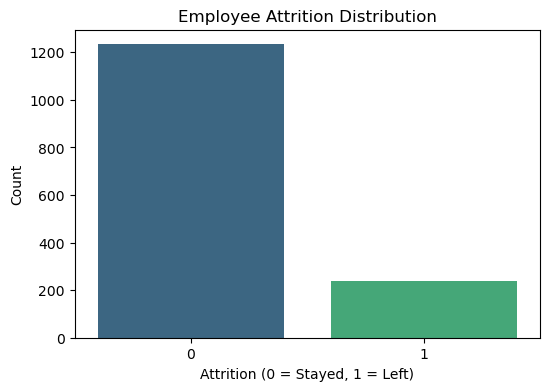

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Employee Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='viridis')
plt.title("Employee Attrition Distribution")
plt.xlabel('Attrition (0 = Stayed, 1 = Left)')
plt.ylabel('Count')
plt.show()



The bar plot represents the distribution of attrition target variable. The x-axis represents the two classes of target variable and y-axis represents the count of employess in each classes. The analysis made from this visualization is that the dataset has a strong imbalance with more employees staying in the company than leaving.

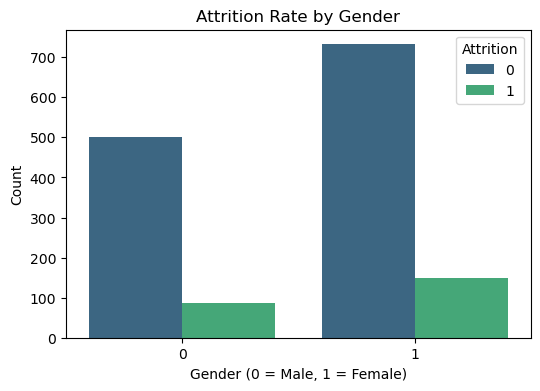

In [69]:
# Attrition by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='viridis')
plt.title("Attrition Rate by Gender")
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()




By comparing attrition rates across genders, we can observe whether males or females have a higher likelihood of leaving the company.

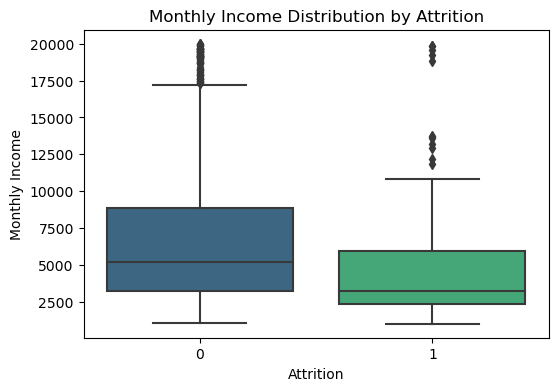

In [70]:
# Attrition vs. Monthly Income (Boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='viridis')
plt.title("Monthly Income Distribution by Attrition")
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

The boxplot illustrates that employees with higher monthly income tend to stay longer, while employees with lower income are more likely to leave. 

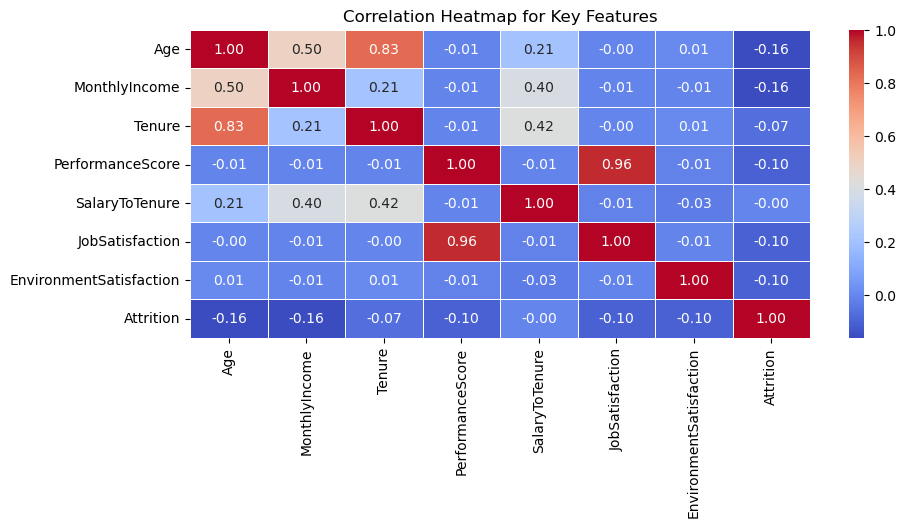

In [64]:
# Correlation matrix for all numerical features and Attrition
corr_matrix = df[['Age', 'MonthlyIncome', 'Tenure', 'PerformanceScore', 'SalaryToTenure', 'JobSatisfaction', 'EnvironmentSatisfaction', 'Attrition']].corr()
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for Key Features")
plt.show()

The correlation heatmap shows strong correlations between variables like Job Satisfaction, Performance Rating, and Attrition. Specifically, PerformanceScore and JobSatisfaction are negatively correlated with Attrition, meaning employees with better performance and job satisfaction are less likely to leave.
Monthly Income and Tenure also show a negative correlation with attrition, indicating that higher-income employees with longer tenures tend to stay longer.

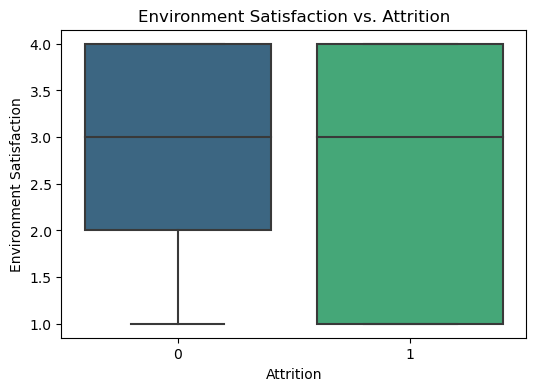

In [71]:
# Visualizing Environment Satisfaction vs. Attrition
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df, palette='viridis')
plt.title("Environment Satisfaction vs. Attrition")
plt.xlabel('Attrition')
plt.ylabel('Environment Satisfaction')
plt.show()

Similar to job satisfaction, Environment Satisfaction plays a significant role in attrition. Employees who are dissatisfied with their work environment are more likely to leave the company.